In [1]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [2]:
clima= pd.read_csv('datos_clima/climadag_extraccion_clima_datos_clima.csv')
clima.head()

,fecha,temp_min,temp_max,temp_tarde,temp_noche,temp_vespertina,temp_manana,humedad_tarde,precipitacion_total,presion_tarde,vel_viento_max,dir_viento_max,nubosidad_tarde,latitude,longitude
0,2014-01-01,24.0,33.2,32.1,25.3,32.2,24.1,56.0,1.25,1008.0,9.26,110.0,40.0,-30.0346,-51.2177
1,2014-01-02,24.0,33.5,30.9,26.7,29.8,24.8,64.0,12.86,1002.0,8.23,330.0,75.0,-30.0346,-51.2177
2,2014-01-03,20.8,24.1,23.1,24.1,22.1,24.0,89.0,20.81,1011.0,6.20,250.0,90.0,-30.0346,-51.2177
3,2014-01-04,17.8,28.5,25.1,20.5,27.5,17.8,50.0,0.00,1019.0,6.69,110.0,40.0,-30.0346,-51.2177
4,2014-01-05,17.4,32.5,27.1,20.5,30.1,17.4,62.0,0.00,1017.0,5.14,120.0,0.0,-30.0346,-51.2177


In [3]:

def verificacion_nulos(clima):
    """
    Función para verificar y eliminar valores nulos en mi dataframe.
    
    Retorna:
    pandas.DataFrame: DataFrame sin valores nulos.
    """
    contando_nulos = clima.isnull().sum()
    total_nulos = contando_nulos.sum()
    
    if total_nulos == 0:
        print("No hay valores nulos en el DataFrame.")
        return clima
    else:
        print("Valores nulos encontrados en las siguientes columnas:")
        print(contando_nulos[contando_nulos > 0])
        
        # Eliminar filas con valores nulos
        clima_limpio = clima.dropna()
        
        # Verificar nuevamente si hay valores nulos después de la limpieza
        nulos_despues_limpios = clima_limpio.isnull().sum()
        nulos_totales_despueslimpios = nulos_despues_limpios.sum()
        
        print("\nValores nulos después de eliminar las filas con nulos:")
        if nulos_totales_despueslimpios == 0:
            print("Todos los valores nulos han sido eliminados.")
        else:
            print(nulos_despues_limpios[nulos_despues_limpios > 0])
        
        return clima_limpio

clima_limpio = verificacion_nulos(clima)


No hay valores nulos en el DataFrame.


In [4]:
clima_limpio.tail(10)

,fecha,temp_min,temp_max,temp_tarde,temp_noche,temp_vespertina,temp_manana,humedad_tarde,precipitacion_total,presion_tarde,vel_viento_max,dir_viento_max,nubosidad_tarde,latitude,longitude
3797,2024-05-25,10.0,12.2,11.2,11.6,11.6,10.50,83.0,0.00,1026.0,4.47,248.0,97.0,-30.0346,-51.2177
3798,2024-05-26,10.0,14.0,13.3,10.5,13.3,10.53,80.0,0.00,1027.0,2.68,237.0,91.0,-30.0346,-51.2177
3799,2024-05-27,13.3,16.1,15.5,13.8,15.5,14.32,95.0,11.34,1019.0,3.58,123.0,100.0,-30.0346,-51.2177
3800,2024-05-28,10.6,12.8,10.6,12.8,12.3,10.66,85.0,0.00,1018.0,5.14,280.0,100.0,-30.0346,-51.2177
3801,2024-05-29,11.7,18.3,15.7,12.8,16.1,12.27,70.0,0.00,1025.0,2.68,233.0,50.0,-30.0346,-51.2177
3802,2024-05-30,12.1,16.6,13.9,13.2,14.9,12.59,86.0,0.00,1025.0,2.24,74.0,7.0,-30.0346,-51.2177
3803,2024-05-31,10.0,18.3,14.4,12.0,16.6,9.96,91.0,0.00,1024.0,3.13,148.0,4.0,-30.0346,-51.2177
3804,2024-06-01,10.9,22.2,17.8,13.7,18.8,11.47,71.0,0.00,1021.0,2.26,349.0,100.0,-30.0346,-51.2177
3805,2024-06-02,12.9,26.7,24.0,16.6,21.3,16.62,62.0,0.00,1017.0,3.16,320.0,1.0,-30.0346,-51.2177
3806,2024-06-03,10.6,17.4,10.6,17.4,12.2,13.38,90.0,18.99,1027.0,9.39,179.0,100.0,-30.0346,-51.2177


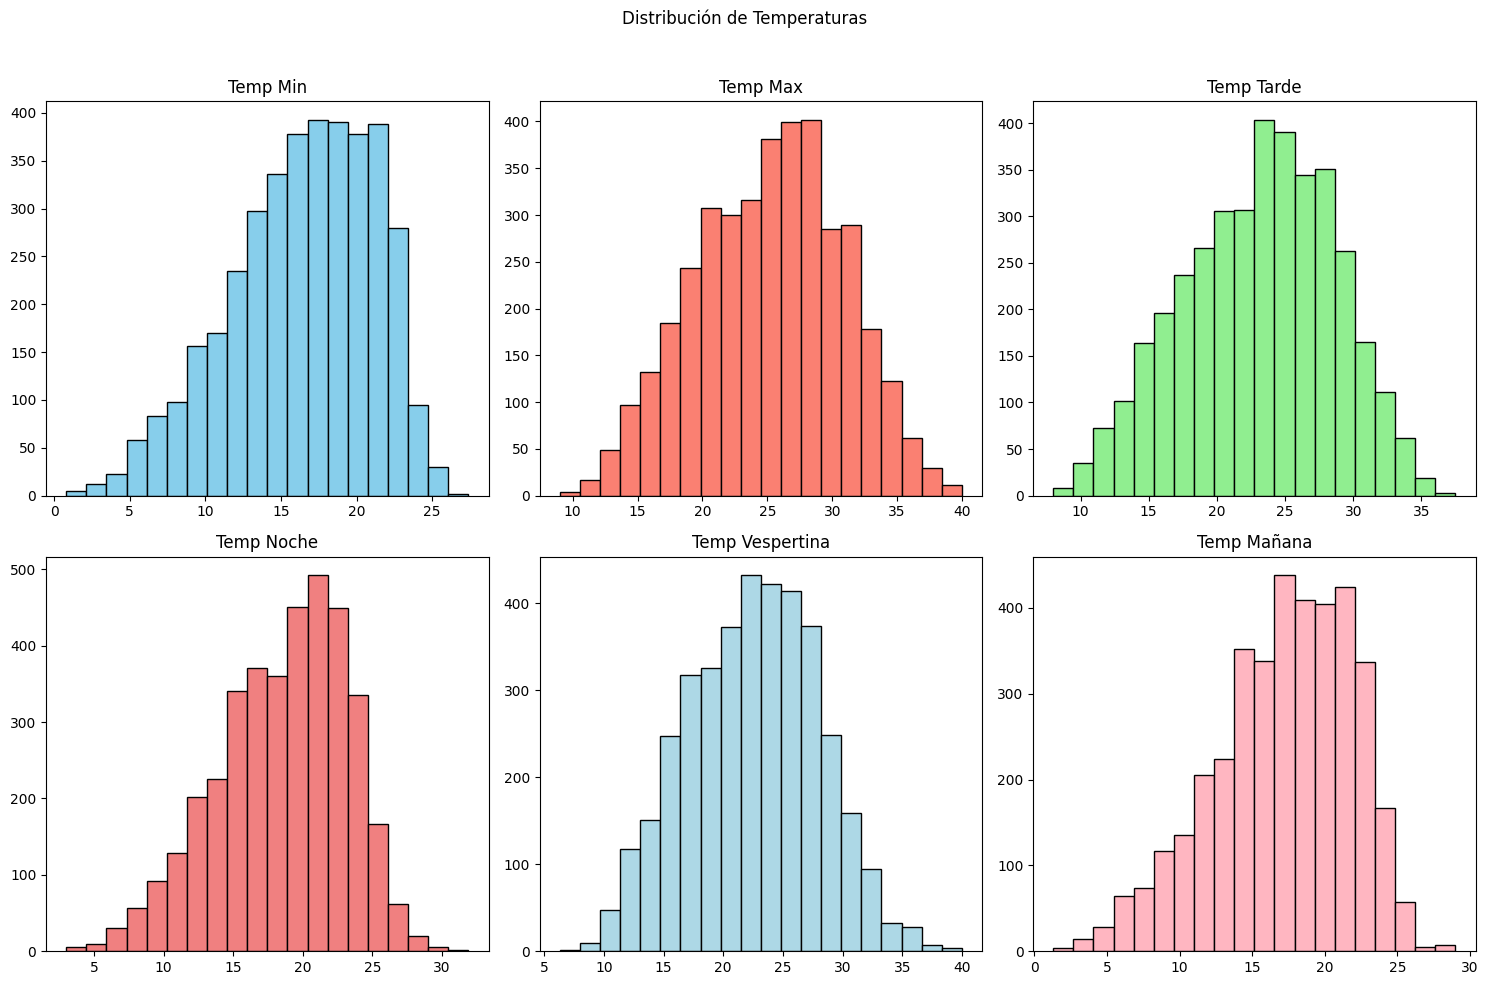

In [5]:

# Histogramas para la distribución de las temperaturas en diferentes momentos del día.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribución de Temperaturas')

axs[0, 0].hist(clima_limpio['temp_min'], bins=20, color='skyblue',edgecolor='black')
axs[0, 0].set_title('Temp Min')

axs[0, 1].hist(clima_limpio['temp_max'], bins=20, color='salmon',edgecolor='black')
axs[0, 1].set_title('Temp Max')

axs[0, 2].hist(clima_limpio['temp_tarde'], bins=20, color='lightgreen',edgecolor='black')
axs[0, 2].set_title('Temp Tarde')

axs[1, 0].hist(clima_limpio['temp_noche'], bins=20, color='lightcoral',edgecolor='black')
axs[1, 0].set_title('Temp Noche')

axs[1, 1].hist(clima_limpio['temp_vespertina'], bins=20, color='lightblue',edgecolor='black')
axs[1, 1].set_title('Temp Vespertina')

axs[1, 2].hist(clima_limpio['temp_manana'], bins=20, color='lightpink',edgecolor='black')
axs[1, 2].set_title('Temp Mañana')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


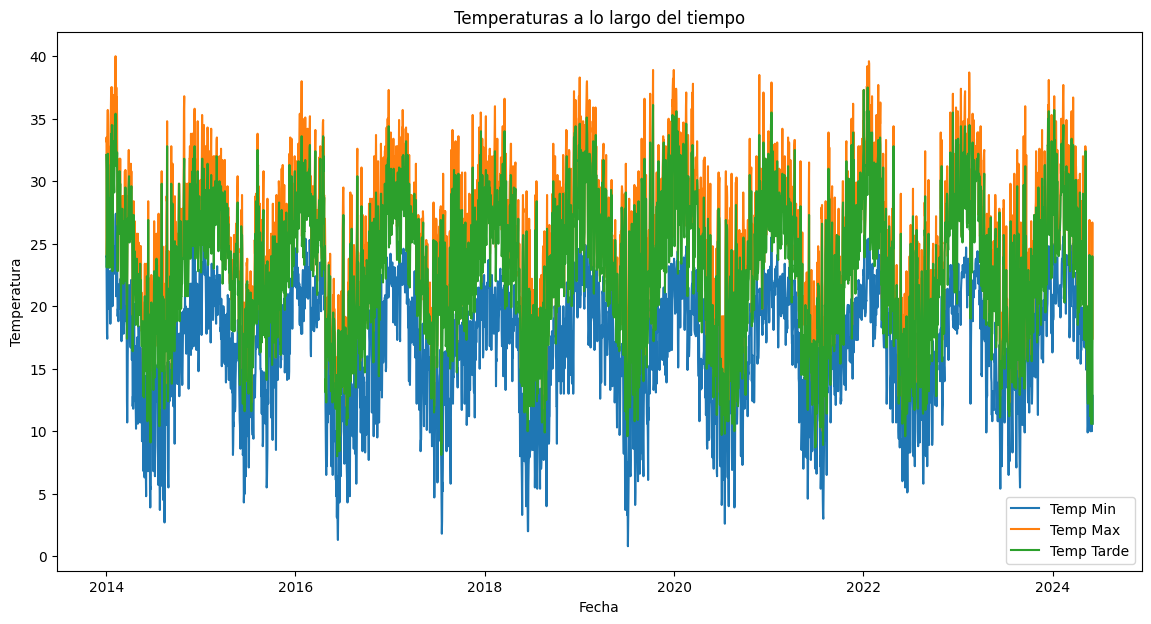

In [6]:
#Serie Temporal de Temperaturas a lo largo del tiempo.

# Siempre convierto las columnas  'fecha' a formato datetime. 
clima_limpio['fecha'] = pd.to_datetime(clima_limpio['fecha'])

plt.figure(figsize=(14, 7))
plt.plot(clima_limpio['fecha'], clima_limpio['temp_min'], label='Temp Min')
plt.plot(clima_limpio['fecha'], clima_limpio['temp_max'], label='Temp Max')
plt.plot(clima_limpio['fecha'], clima_limpio['temp_tarde'], label='Temp Tarde')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.title('Temperaturas a lo largo del tiempo')
plt.legend()
plt.show()


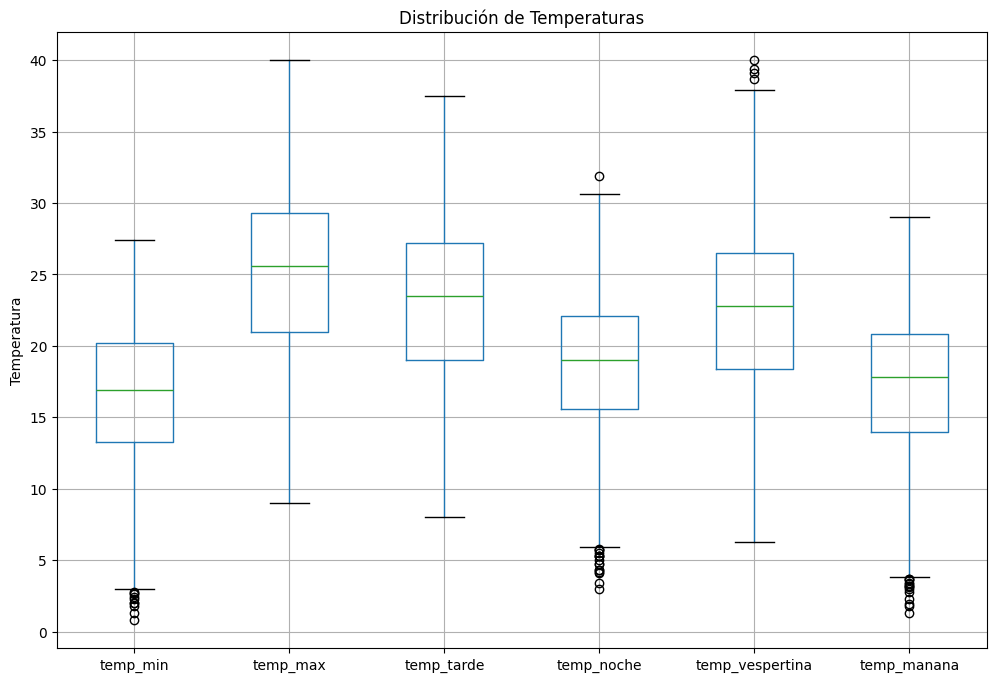

In [7]:
# Boxplots para las diferentes temperaturas
clima_limpio[['temp_min', 'temp_max', 'temp_tarde', 'temp_noche', 'temp_vespertina', 'temp_manana']].boxplot(figsize=(12, 8))
plt.title('Distribución de Temperaturas')
plt.ylabel('Temperatura')
plt.show()


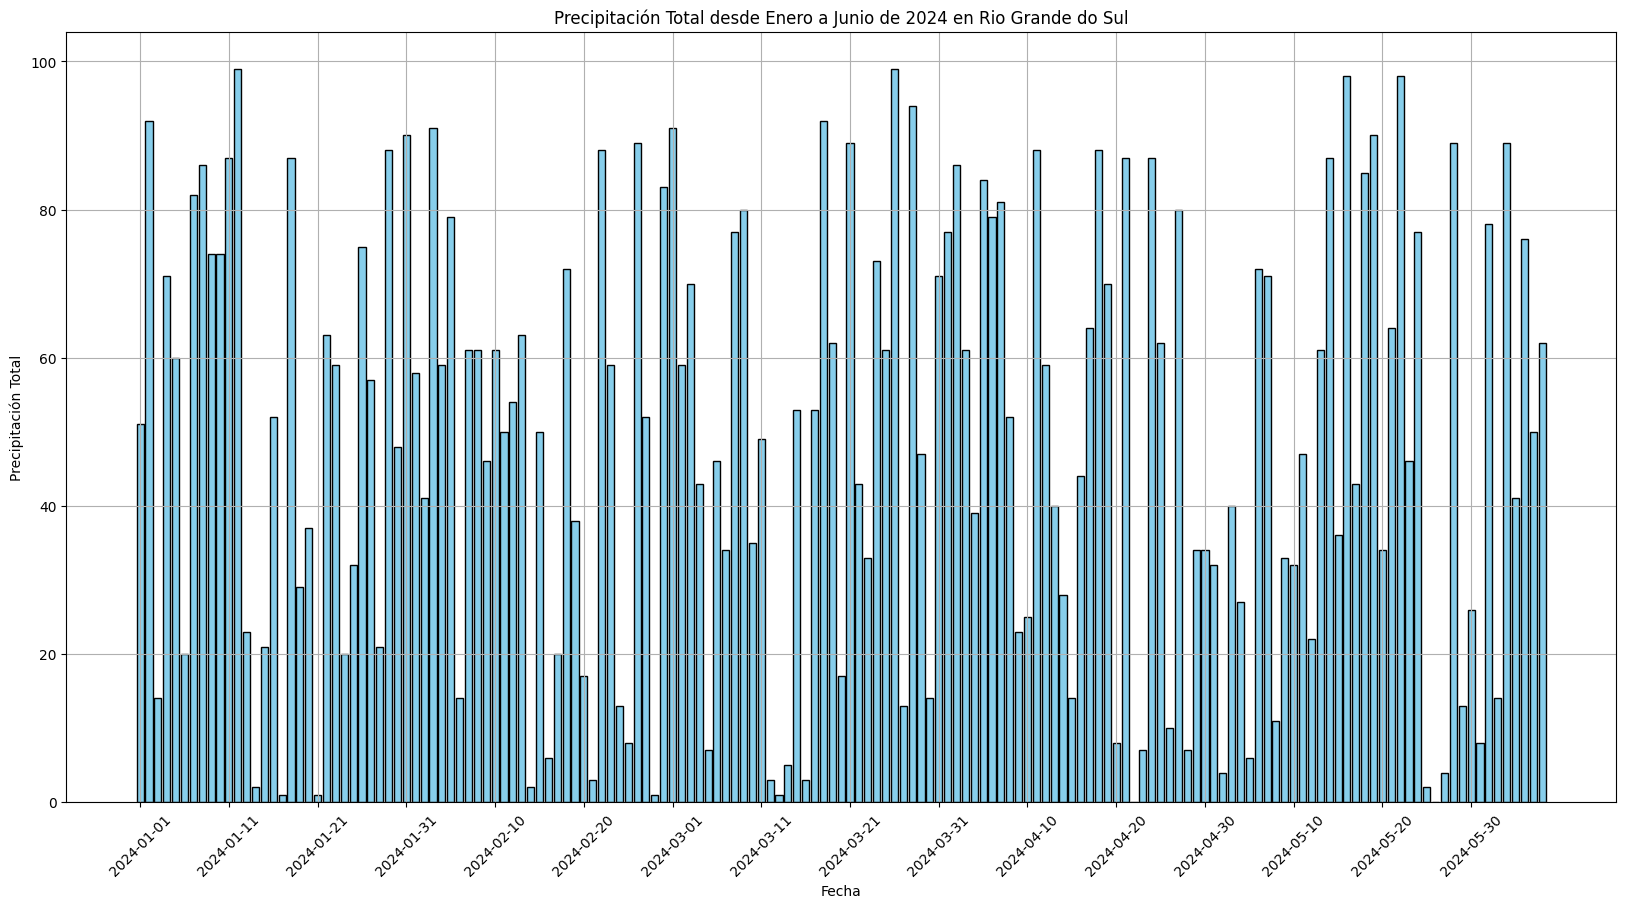

In [9]:
date_range = pd.date_range(start='2024-01-01', end='2024-06-07', freq='D')

np.random.seed(42)  # Para reproducibilidad
data = {
    'fecha': date_range,
    'precipitacion_total': np.random.randint(0, 100, size=len(date_range)),
    'dir_viento_max': np.random.randint(0, 360, size=len(date_range)),
    'vel_viento_max': np.random.randint(0, 20, size=len(date_range)),
    'temp_min': np.random.randint(10, 30, size=len(date_range)),
    'humedad_tarde': np.random.randint(30, 100, size=len(date_range))
}

clima_limpio = pd.DataFrame(data)

clima_limpio['fecha'] = pd.to_datetime(clima_limpio['fecha'])

clima_por_fecha = clima_limpio.groupby('fecha')['precipitacion_total'].sum().reset_index()

clima_rango_especifico = clima_por_fecha[(clima_por_fecha['fecha'] >= '2024-01-01') & (clima_por_fecha['fecha'] <= '2024-06-07')]

# Visualizar la precipitación a lo largo del tiempo en un gráfico de barras
plt.figure(figsize=(20, 10))
plt.bar(clima_rango_especifico['fecha'], clima_rango_especifico['precipitacion_total'], color='skyblue', edgecolor='black')
plt.xlabel('Fecha')
plt.ylabel('Precipitación Total')
plt.title('Precipitación Total desde Enero a Junio de 2024 en Rio Grande do Sul')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X

num_labels = 15  # Ajusta este número para mostrar más o menos etiquetas
plt.xticks(ticks=clima_rango_especifico['fecha'][::len(clima_rango_especifico) // num_labels], rotation=45)

plt.grid(True)
plt.show()


Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)
Precipitación total en Rio Grande do Sul: 19.64 mm


<Figure size 1200x800 with 0 Axes>

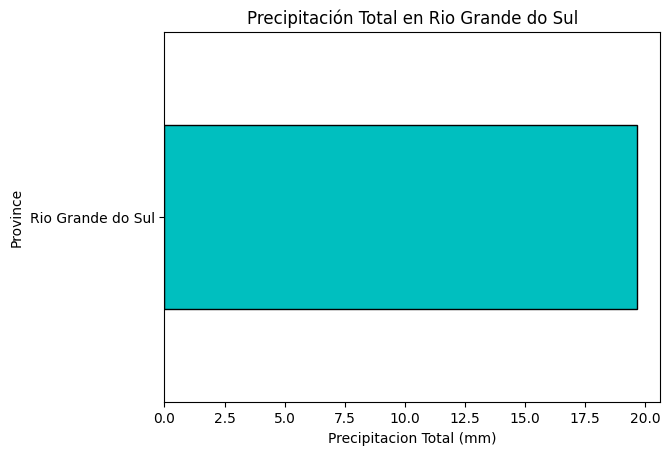

In [10]:
import geopandas as gpd
shapefile_path = 'ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp'  # Cambia la ruta al archivo correcto

gdf = gpd.read_file(shapefile_path)
print(gdf.columns)

gdf_rio_grande_do_sul = gdf[gdf['name'] == 'Rio Grande do Sul']  # Cambia 'NAME_1' si es necesario


data = {
    'province': ['Rio Grande do Sul', 'Rio Grande do Sul', 'São Paulo', 'Minas Gerais'],
    'precipitacion_total': [6.97, 12.67	, 31.74, 5.49],
    'latitude': [-30.0346, -30.0346, -30.0346, -30.0346],
    'longitude': [-51.2177, -51.2177, -51.2177, -51.2177]
}
clima_limpio = pd.DataFrame(data)

precipitacion_por_riogrande = clima_limpio.groupby('province')['precipitacion_total'].sum().sort_values()

precipitacion_riograndedosul = precipitacion_por_riogrande['Rio Grande do Sul']

print(f"Precipitación total en Rio Grande do Sul: {precipitacion_riograndedosul} mm")

df_precipitacion_rio_grande_do_sul = pd.DataFrame({
    'province': ['Rio Grande do Sul'],
    'precipitacion_total': [precipitacion_riograndedosul]
})

plt.figure(figsize=(12, 8))
df_precipitacion_rio_grande_do_sul.plot(kind='barh', x='province', y='precipitacion_total', color='c', legend=False,edgecolor='black')
plt.xlabel('Precipitacion Total (mm)')
plt.ylabel('Province')
plt.title('Precipitación Total en Rio Grande do Sul')
plt.show()


Precipitación total en Rio Grande do Sul: 43.489999999999995 mm


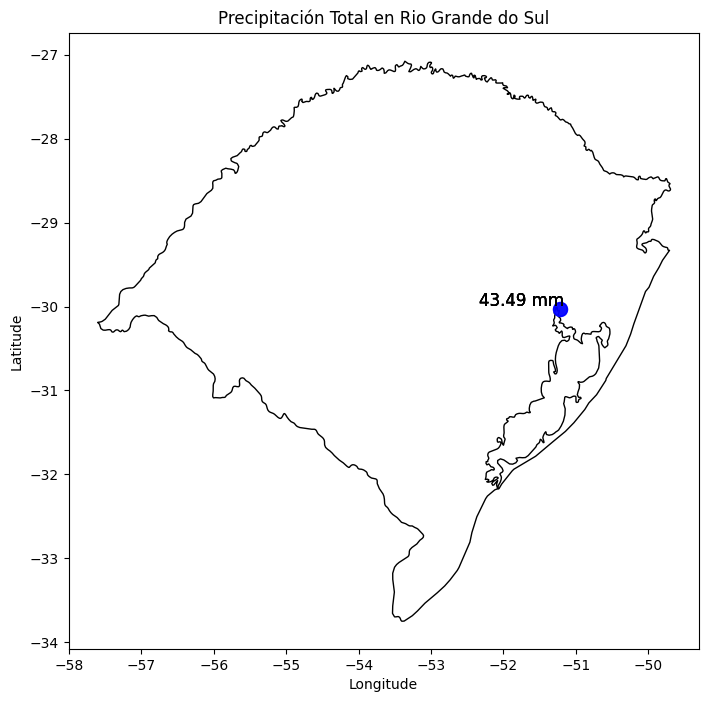

In [11]:
shapefile_path = 'ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp'  # Cambia la ruta al archivo correcto

gdf = gpd.read_file(shapefile_path)

gdf_rio_grande_do_sul = gdf[gdf['name'] == 'Rio Grande do Sul']  # Cambia 'name' si es necesario

# Estos datos los tomo del cuadro de arriba
data = {
    'province': ['Rio Grande do Sul', 'Rio Grande do Sul', 'Rio Grande do Sul', 'Rio Grande do Sul'],
    'precipitacion_total': [0.00, 38.37, 2.56, 2.56],
    'latitude': [-30.0346, -30.0346, -30.0346, -30.0346],
    'longitude': [-51.2177, -51.2177, -51.2177, -51.2177]
}
clima_limpio = pd.DataFrame(data)

# Calcular
precipitacion_por_riogrande = clima_limpio.groupby('province')['precipitacion_total'].sum().sort_values()

precipitacion_riograndedosul = precipitacion_por_riogrande['Rio Grande do Sul']

print(f"Precipitación total en Rio Grande do Sul: {precipitacion_riograndedosul} mm")

# aca hago un dataframe para graficar la presipitacion de rio grande do sul
df_precipitacion_rio_grande_do_sul = pd.DataFrame({
    'province': ['Rio Grande do Sul'],
    'precipitacion_total': [precipitacion_riograndedosul]
})

# Plot del mapa de Rio Grande do Sul con la precipitación
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plotear el mapa de Rio Grande do Sul
gdf_rio_grande_do_sul.plot(ax=ax, color='white', edgecolor='black')

# en este fragmento lo que sea hace es poner el punto de la presipitacion total
#se ajusta el texto con ax.text y etc.
for x, y in zip(clima_limpio.longitude, clima_limpio.latitude):
    ax.scatter(x, y, color='blue', s=100, alpha=0.5)
    ax.text(x + 0.05, y, f'{precipitacion_riograndedosul:.2f} mm', fontsize=12, ha='right', va='bottom')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Precipitación Total en Rio Grande do Sul')
plt.show()
